In [1]:
## Practical 1: Make a simple SQL table.
# The table holds 2 columns, X and Y.
# X and Y are coordinates of 20 points located on the circumference of a circle
# Only positive values of both X and y are included

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

<function matplotlib.pyplot.show(close=None, block=None)>

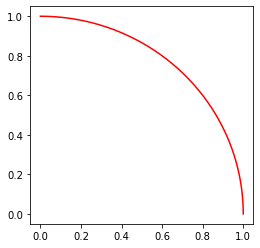

In [3]:
x = np.linspace(0,1, 10_000)
y = (1-x**2)**(1/2)

plt.figure(figsize=(4,4))
plt.plot(x, y ,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

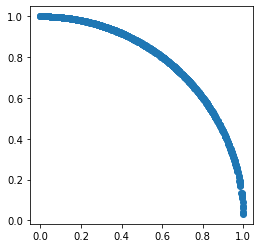

In [4]:
idx = np.sort(np.random.randint(10_000, size=1_000))
x_dat = x[idx]
y_dat = y[idx]

plt.figure(figsize=(4,4))
plt.scatter(x_dat, y_dat)
plt.show

In [5]:
mult = np.random.uniform(0.95, 1.05, size=1_000)
diff_err = np.random.uniform(-0.1, 0.1, size=1_000)

x_tilde = x_dat*mult
y_tilde = y_dat*mult

# For demo
y_demo_1 = ((1-x_tilde**2)**(1/2))/mult
y_demo_2 = y_dat + diff_err

C:\Users\Toffee\AppData\Local\Temp\ipykernel_1988\1091117849.py:8: RuntimeWarning: invalid value encountered in sqrt
  y_demo_1 = ((1-x_tilde**2)**(1/2))/mult


<function matplotlib.pyplot.show(close=None, block=None)>

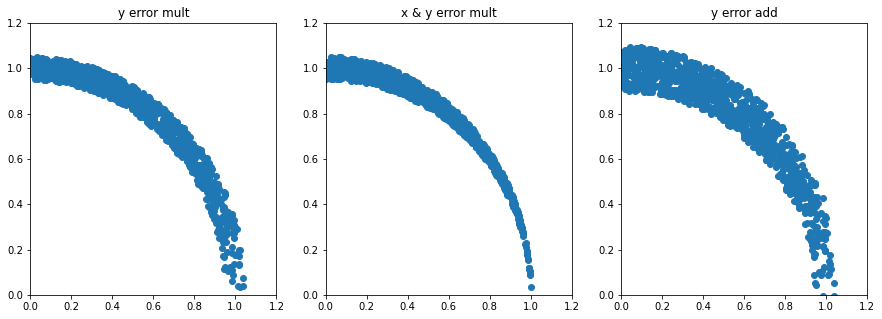

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('y error mult')
plt.scatter(x_tilde, y_tilde)
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)

plt.subplot(1, 3, 2)
plt.title('x & y error mult')
plt.scatter(x_tilde, y_demo_1)
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)

plt.subplot(1, 3, 3)
plt.title('y error add')
plt.scatter(x_tilde, y_demo_2)
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show

In [7]:
db = sqlite3.connect('Practical_1.db')

print ("Opened database successfully")

Opened database successfully


In [8]:
try:
    db.execute('''
    CREATE TABLE COORDINATES(
        x REAL,
        y REAL,
        mult REAL,
        x_tilde REAL,
        y_tilde REAL);
    ''')
except:
    pass

print ("Created table successfully.")

Created table successfully.


In [9]:
for _, val in enumerate(x_dat):
    db.execute('''
    INSERT INTO COORDINATES
        (x, y, mult, x_tilde, y_tilde)
    VALUES
        (?, ?, ?, ?, ?)
    ''', (val, y_dat[_], mult[_], x_tilde[_], y_tilde[_]))

db.commit()